# Loading Libraries and Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import warnings
import json

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
df['sex'] = df['sex'].replace({0: 'female', 1: 'male'})
df['fasting blood sugar'] = df['fasting blood sugar'].replace({0:'false', 1:'true'})
df['exercise angina'] = df['exercise angina'].replace({0:'no',1:'yes'})
df['target'] = df['target'].replace({1:'heart disease', 0:'Normal'})
df['chest pain type'] = df['chest pain type'].replace({1:'typical angina', 2:'atypical angina', 3:'non-anginal pain',4:'asymptomatic'})
df['resting ecg'] = df['resting ecg'].replace({0:'normal', 1:'having ST-T wave abnormality', 2:'probable or definite left ventricular hypertrophy'})
df['ST slope'] = df['ST slope'].replace({1:'upsloping', 2:'flat', 3:'downsloping'})

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,atypical angina,140,289,false,normal,172,no,0.0,upsloping,Normal
1,49,female,non-anginal pain,160,180,false,normal,156,no,1.0,flat,heart disease
2,37,male,atypical angina,130,283,false,having ST-T wave abnormality,98,no,0.0,upsloping,Normal
3,48,female,asymptomatic,138,214,false,normal,108,yes,1.5,flat,heart disease
4,54,male,non-anginal pain,150,195,false,normal,122,no,0.0,upsloping,Normal


In [7]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

# Plot  for   Age 


Text(0.5, 1.0, 'Age Distribution')

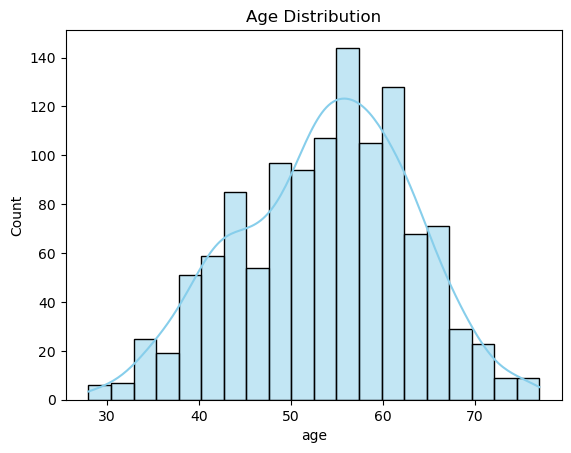

In [8]:
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Plot  for   Gender 


Text(0.5, 1.0, 'Gender Distribution')

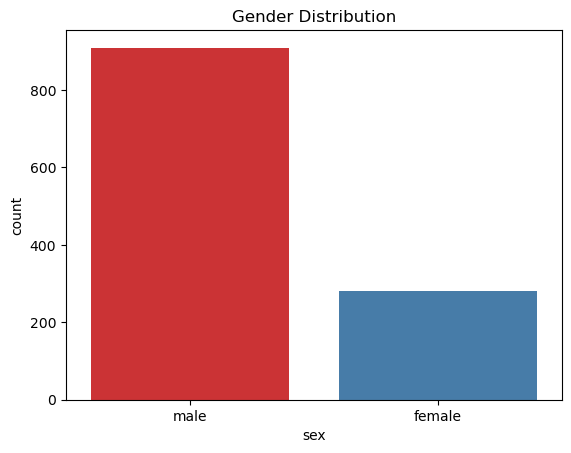

In [9]:
sns.countplot(x='sex', data=df, palette='Set1')
plt.title('Gender Distribution')

# Plot  for   chest pain 


(array([0, 1, 2, 3]),
 [Text(0, 0, 'atypical angina'),
  Text(1, 0, 'non-anginal pain'),
  Text(2, 0, 'asymptomatic'),
  Text(3, 0, 'typical angina')])

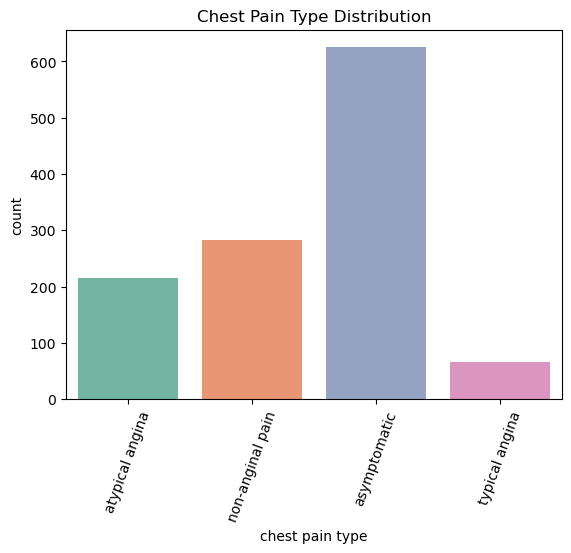

In [10]:
sns.countplot(x='chest pain type', data=df, palette='Set2')
plt.title('Chest Pain Type Distribution')
plt.xticks(rotation=70) 

# Plot  for   Cholesterol 


Text(0.5, 1.0, 'Cholesterol Distribution')

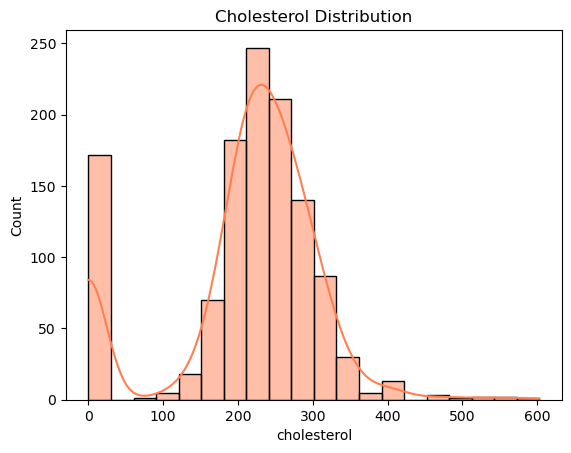

In [11]:
sns.histplot(df['cholesterol'], kde=True, bins=20, color='coral')
plt.title('Cholesterol Distribution')

# Removing outliers from Chelostrol

In [12]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

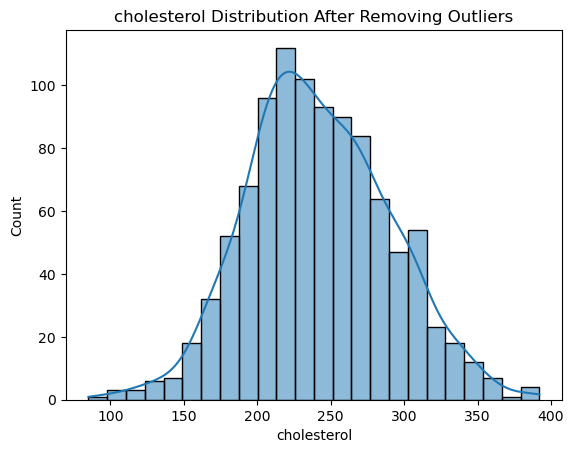

In [13]:
outliers = detect_outliers_iqr(df, "cholesterol")
df = df.drop(outliers.index)
    
sns.histplot(df['cholesterol'], kde=True)
plt.title(f'cholesterol Distribution After Removing Outliers')
plt.show()


# Plot  for   Blood Sugar 


Text(0.5, 1.0, 'Fasting Blood Sugar Distribution')

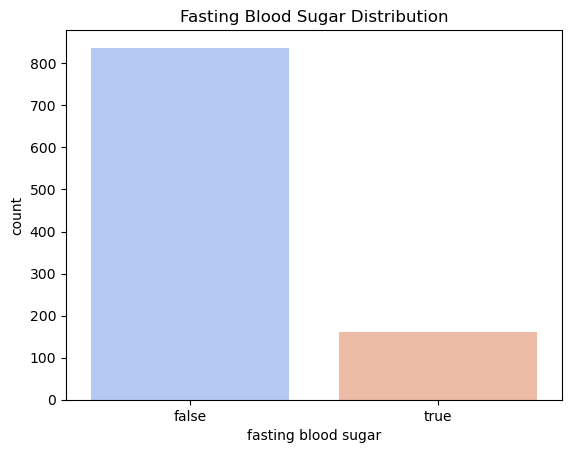

In [14]:
sns.countplot(x='fasting blood sugar', data=df, palette='coolwarm')
plt.title('Fasting Blood Sugar Distribution')


# Convert Numeric features to proper Dtype and put into discrete bins then binarize


In [15]:
numeric_features=['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df['age'] = df['age'].astype('int')
df['resting bp s'] = df['resting bp s'].astype('int')
df['max heart rate'] = df['max heart rate'].astype('int')
df['cholesterol'] = df['cholesterol'].astype('int')
df['oldpeak'] = df['oldpeak'].astype('float')


# Apply KBinsDiscretizer


In [16]:
encoder = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df[numeric_features] = encoder.fit_transform(df[numeric_features])

In [17]:
for i, feature in enumerate(numeric_features):
    bin_edges = encoder.bin_edges_[i]
    labels = [f"{bin_edges[j]:.2f}-{bin_edges[j+1]:.2f}" for j in range(len(bin_edges)-1)]
    df[feature] = df[feature].map(lambda x: labels[int(x)] if not pd.isnull(x) else None)

In [18]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,37.80-42.70,male,atypical angina,135.20-146.00,269.20-299.90,false,normal,162.70-175.80,no,-0.10-0.53,upsloping,Normal
1,47.60-52.50,female,non-anginal pain,156.80-167.60,177.10-207.80,false,normal,149.60-162.70,no,0.53-1.16,flat,heart disease
2,32.90-37.80,male,atypical angina,124.40-135.20,269.20-299.90,false,having ST-T wave abnormality,97.20-110.30,no,-0.10-0.53,upsloping,Normal
3,47.60-52.50,female,asymptomatic,135.20-146.00,207.80-238.50,false,normal,97.20-110.30,yes,1.16-1.79,flat,heart disease
4,52.50-57.40,male,non-anginal pain,146.00-156.80,177.10-207.80,false,normal,110.30-123.40,no,-0.10-0.53,upsloping,Normal


In [19]:
df=df.astype('str')
encoder = OneHotEncoder(sparse=False)
encoded=encoder.fit_transform(df)
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df.columns))


In [20]:
encoded_df.head()

,age_28.00-32.90,age_32.90-37.80,age_37.80-42.70,age_42.70-47.60,age_47.60-52.50,age_52.50-57.40,age_57.40-62.30,age_62.30-67.20,age_67.20-72.10,age_72.10-77.00,...,oldpeak_3.68-4.31,oldpeak_4.31-4.94,oldpeak_4.94-5.57,oldpeak_5.57-6.20,ST slope_0,ST slope_downsloping,ST slope_flat,ST slope_upsloping,target_Normal,target_heart disease
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
freq=fpgrowth(encoded_df,min_support=0.20,use_colnames=True)
# print(freq)

In [22]:
rules=association_rules(freq,metric="confidence",min_threshold=0.65)
# print(rules)

In [23]:
filtered_rules = rules[rules['consequents'].apply(lambda x: 'target_heart disease' in str(x))]


In [24]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
380,(chest pain type_asymptomatic),(target_heart disease),0.487462,0.467402,0.357071,0.732510,1.567195,0.129230,1.991096,0.706128
387,"(fasting blood sugar_false, chest pain type_as...",(target_heart disease),0.408225,0.467402,0.285858,0.700246,1.498165,0.095052,1.776781,0.561897
391,"(chest pain type_asymptomatic, sex_male)",(target_heart disease),0.396189,0.467402,0.311936,0.787342,1.684506,0.126756,2.504478,0.672982
395,"(fasting blood sugar_false, chest pain type_as...",(target_heart disease),0.328987,0.467402,0.251755,0.765244,1.637228,0.097986,2.268728,0.580036
400,(ST slope_flat),(target_heart disease),0.462387,0.467402,0.347041,0.750542,1.605774,0.130920,2.135022,0.701708
404,"(ST slope_flat, fasting blood sugar_false)",(target_heart disease),0.377131,0.467402,0.271815,0.720745,1.542022,0.095543,1.907207,0.564326
408,"(ST slope_flat, sex_male)",(target_heart disease),0.364092,0.467402,0.303912,0.834711,1.785851,0.133734,3.222217,0.691992
410,(ST slope_flat),"(target_heart disease, sex_male)",0.462387,0.412237,0.303912,0.657267,1.594392,0.113299,1.714930,0.693439
413,"(ST slope_flat, fasting blood sugar_false, sex...",(target_heart disease),0.288867,0.467402,0.238716,0.826389,1.768047,0.103699,3.067763,0.610862
417,"(ST slope_flat, sex_male)","(fasting blood sugar_false, target_heart disease)",0.364092,0.370110,0.238716,0.655647,1.771492,0.103962,1.829200,0.684854


In [25]:
rules_dict = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].apply(lambda x: {
    "antecedent": list(x['antecedents']),
    "consequent": list(x['consequents']),
    "support": x['support'],
    "confidence": x['confidence'],
    "lift": x['lift']
}, axis=1).tolist()

In [26]:
# Save the rules to a JSON file
with open('heart_association_rules.json', 'w') as file:
    json.dump(rules_dict, file)

# Make Predection from user Input

In [27]:
import json

# Load the association rules from the JSON file
with open('heart_association_rules.json', 'r') as file:
    association_rules = json.load(file)

# Function to take user input
def get_user_input():
    user_input = {
        'age': input("Enter age: "),
        'sex': input("Enter sex (male/female): "),
        'chest pain type': input("Enter chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic): "),
        'cholesterol': input("Enter cholesterol level: "),
        'exercise angina': input("Exercise-induced angina? (yes/no): "),
        'ST slope': input("Enter ST slope (upsloping, flat, downsloping): ")
    }
    return user_input

# Pre-process user input (you might need to discretize age and cholesterol)
def preprocess_input(user_input):
    # Map strings to the one-hot encoded format
    processed_input = {
        'age': user_input['age'],  # discretize as needed
        'sex': f"sex_{user_input['sex']}",
        'chest pain type': f"chest pain type_{user_input['chest pain type']}",
        'exercise angina': f"exercise angina_{user_input['exercise angina']}",
        'ST slope': f"ST slope_{user_input['ST slope']}"
    }
    return processed_input

# Predict using association rules
def predict_disease(user_input, association_rules):
    for rule in association_rules:
        antecedents = rule['antecedent']
        if all(feature in user_input.values() for feature in antecedents):
            return f"Prediction: {rule['consequent']} with confidence: {rule['confidence']} and lift: {rule['lift']}"
    return "No significant indicators of heart disease were found based on the provided input."

# Main program flow
user_input = get_user_input()
processed_input = preprocess_input(user_input)
prediction = predict_disease(processed_input, association_rules)
print(prediction)


No significant indicators of heart disease were found based on the provided input.
